In [1]:
%load_ext cudf

The cudf module is not an IPython extension.


In [2]:
%load_ext cuml.accel

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)

In [18]:
df = pd.read_csv('data/feature_engineered_data/feature_engineered_type_2_reduced.csv')

/tmp/ipykernel_5684/1191740963.py:1: DtypeWarning: Columns (58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/feature_engineered_data/feature_engineered_type_2_reduced.csv')


In [ ]:
df.shape

(49391, 59)

In [ ]:
df.head()

,Second,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF8,Gamma_TP10,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyro_X,Gyro_Y,Gyro_Z,HSI_TP9_flag,HSI_TP10_flag,HSI_AF7_flag,HSI_AF8_flag,fix_count,fix_mean_dur,fix_dur_var,fix_disp_mean,fix_x_var,fix_y_var,sac_count,sac_mean_dur,sac_amp_mean,sac_vel_mean,sac_acc_mean,sac_dec_mean,sac_dir_var,fix_valid,sac_valid,fix_sac_count_ratio,fix_sac_time_ratio,fix_rate,sac_rate,Gaze X,Gaze Y,Interpolated Distance,Gaze Velocity,Gaze Acceleration,ET_ValidityLeft,ET_ValidityRight,ResponseTime,Difficulty,Idle,Student,QuestionKey
0,0,0.975708,1.087841,1.473732,1.109423,0.846527,0.502052,0.948536,0.733450,0.626364,1.264374,0.669355,-0.152018,-0.016578,1.257796,0.068996,-0.647812,1.086996,-0.025294,0.147304,0.998543,-0.613024,2.555341,4.179880,0.0,0.0,0.0,0.0,96.0,311.619409,31334.796170,0.175403,136402.478510,66467.086301,25.0,53.745926,6.564607,202.073094,8890.605309,-8627.672550,1972.987703,1.0,1.0,3.839998,22.264358,0.003209,0.018606,913.103306,739.458678,579.784202,31.249931,-6.525671,0.074380,0.000000,7.654472,0.0,0,1,1Item1
1,1,0.888970,0.162785,0.519330,1.110633,0.611549,-0.128711,0.856370,0.700926,0.111918,1.198564,0.458237,-0.386038,-0.094551,1.258937,-0.107697,-0.721314,1.155676,-0.027976,0.145845,0.998556,-0.599028,2.730229,4.215748,0.0,0.0,0.0,0.0,116.0,306.353083,12692.712854,0.142642,249.337145,1857.949767,4.0,12.586613,0.290974,32.149300,726.570285,0.000000,0.000000,1.0,1.0,28.999928,705.848190,0.003264,0.079449,331.070833,281.716667,576.905212,8.956871,5.648079,0.000000,0.066667,7.654472,0.0,0,1,1Item1
2,2,0.422061,-0.167550,-0.145389,1.034297,0.374435,-0.397603,0.754324,0.786090,-0.249427,1.042237,0.420512,-0.527437,-0.154645,1.339769,-0.312941,-0.678023,1.327010,-0.028670,0.146491,0.998299,-0.597799,2.519190,4.362680,0.0,0.0,0.0,0.0,107.0,346.124971,15268.526548,0.196410,18768.997145,24199.116250,13.0,42.955415,4.124228,132.086826,5799.665215,-5180.357070,465.364795,1.0,1.0,8.230763,66.321666,0.002889,0.023280,398.270833,411.200000,577.182475,17.188205,-4.963674,0.000000,0.016667,7.654472,0.0,0,1,1Item1
3,3,0.760047,0.646647,0.427700,0.880597,0.899652,-0.333857,0.895805,1.149560,-0.153594,1.183161,0.624013,-0.404363,-0.051982,1.294949,-0.055060,-0.370361,1.137188,-0.027873,0.146587,0.998704,-0.666497,2.556757,3.941415,0.0,0.0,0.0,0.0,104.0,601.330480,138999.949372,0.147897,76207.197913,27947.237737,13.0,36.540588,4.120809,202.940889,4359.349890,-9115.078653,20230.017916,1.0,1.0,7.999994,131.652060,0.001663,0.027367,1131.911017,452.216102,578.874069,23.003946,-440.517593,0.016667,0.025000,7.654472,0.0,0,1,1Item1
4,4,0.817159,0.653825,0.647291,0.907238,0.810389,-0.165551,0.899771,1.012238,-0.003289,1.137658,0.550315,-0.263243,-0.126325,1.403144,-0.166295,-0.455335,1.165970,-0.026438,0.144706,0.998547,-0.590325,2.582196,4.397048,0.0,0.0,0.0,0.0,107.0,660.522381,106887.221253,0.198848,67911.015554,22148.236533,13.0,54.293946,9.983783,305.476766,13383.938460,-15357.952174,3812.465272,1.0,1.0,8.230763,100.132843,0.001514,0.018418,1278.021008,429.546218,576.959493,29.834330,11.945481,0.033333,0.025000,7.654472,0.0,0,1,1Item1


In [ ]:
# Drop Student & QuestionKey
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]

In [5]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", linear_model)
])

In [ ]:
linear_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('linreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [ ]:
y_pred = linear_pipeline.predict(X_test)

In [ ]:
linear_pipeline.score(X_test, y_test)

0.6125659851640627

In [8]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  143.8437487837487
R2 Score:  0.6125659851640627
Mean Absolute Error:  7.627111826753946
Root Mean Squared Error:  11.99348776560633


In [9]:
from sklearn.model_selection import GroupKFold, cross_val_score

In [ ]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]
groups = df["Student"]

In [ ]:
model = LinearRegression()

In [ ]:
cv = GroupKFold(n_splits=5)

In [ ]:
scores = cross_val_score(model, X, y, cv=cv, groups=groups, scoring="r2")

In [ ]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.51199359 0.60331385 0.59136111 0.62205461 0.63104091]
Mean R²: 0.5919528136703132


In [ ]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]
groups = df["Student"]

In [ ]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

In [ ]:
cv = GroupKFold(n_splits=5)

In [ ]:
scores = cross_val_score(pipeline, X, y, cv=cv, groups=groups, scoring="r2")

In [ ]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.51087805 0.60442983 0.59153631 0.62183162 0.6312643 ]
Mean R²: 0.5919880237630804


# **Observation:**

The linear regression model achieved an R2 score of approximately 0.56 on the test set. This indicates that about 56% of the variance in the response time can be explained by the features used in the model. The cross-validation results show a similar mean R2 score of around 0.46, with some variation across the folds. This suggests that while the model has some predictive power, there is still a significant portion of the variance in response time that is not being captured by this linear model.

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GroupKFold, cross_val_score

In [ ]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]
groups = df["Student"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf_model.fit(X_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  48.806068601122846
R2 Score:  0.8685439494842508
Mean Absolute Error:  3.5137773527211826
Root Mean Squared Error:  6.986134023988006


In [ ]:
rf_model_cv  = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
cv = GroupKFold(n_splits=5)

In [ ]:
scores = cross_val_score(rf_model_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [ ]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.72354555 0.7610184  0.76537107 0.76824265 0.76445914]
Mean R²: 0.7565273591662022


In [ ]:
importances = rf_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:20]  # top 20

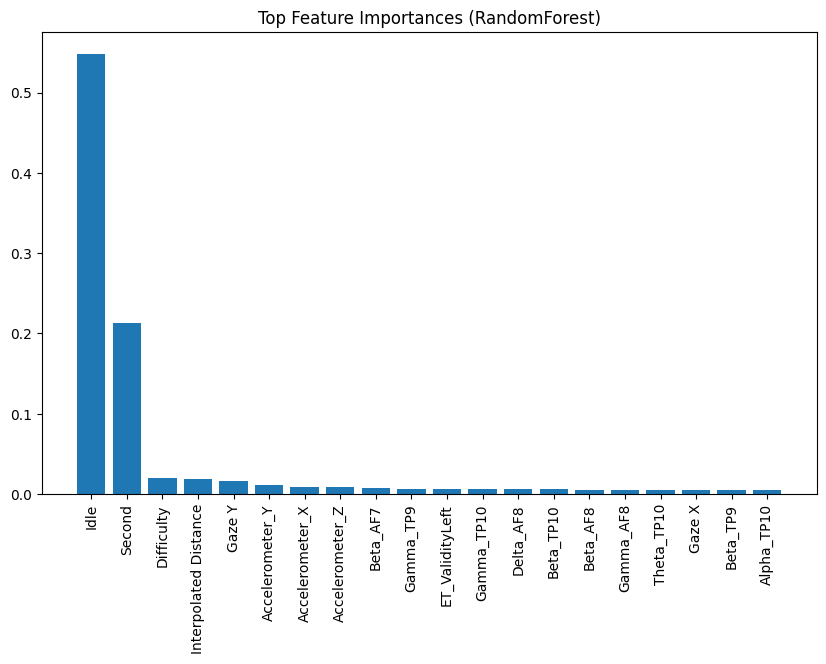

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (RandomForest)")
plt.show()

**Observation: Random Forest Model Performance and Feature Importance**

Based on the metrics you provided, the Random Forest model is performing very well. The R2 score of 0.868 on the test set indicates that the model explains a large portion of the variance in response time. The mean R2 from cross-validation (0.757) is also good and more consistent across folds compared to the previous model. This suggests that the model generalizes reasonably well to unseen data. The low Mean Squared Error (48.8) and Root Mean Squared Error (6.99) further indicate that the model's predictions are close to the actual response times.

Additionally, the feature importance plot from the Random Forest model highlights the features that contributed most to the model's predictions. It has been observed that the ```Idle``` and ```Second``` columns are dominating the feature importance. Since the main goal is to predict response time from EEG, IVT, and eye-tracking data, and these columns are considered misleading for this purpose, they will be removed for training the next model.

In [ ]:
df.head()

,Second,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF8,Gamma_TP10,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyro_X,Gyro_Y,Gyro_Z,HSI_TP9_flag,HSI_TP10_flag,HSI_AF7_flag,HSI_AF8_flag,fix_count,fix_mean_dur,fix_dur_var,fix_disp_mean,fix_x_var,fix_y_var,sac_count,sac_mean_dur,sac_amp_mean,sac_vel_mean,sac_acc_mean,sac_dec_mean,sac_dir_var,fix_valid,sac_valid,fix_sac_count_ratio,fix_sac_time_ratio,fix_rate,sac_rate,Gaze X,Gaze Y,Interpolated Distance,Gaze Velocity,Gaze Acceleration,ET_ValidityLeft,ET_ValidityRight,ResponseTime,Difficulty,Idle,Student,QuestionKey
0,0,0.975708,1.087841,1.473732,1.109423,0.846527,0.502052,0.948536,0.733450,0.626364,1.264374,0.669355,-0.152018,-0.016578,1.257796,0.068996,-0.647812,1.086996,-0.025294,0.147304,0.998543,-0.613024,2.555341,4.179880,0.0,0.0,0.0,0.0,96.0,311.619409,31334.796170,0.175403,136402.478510,66467.086301,25.0,53.745926,6.564607,202.073094,8890.605309,-8627.672550,1972.987703,1.0,1.0,3.839998,22.264358,0.003209,0.018606,913.103306,739.458678,579.784202,31.249931,-6.525671,0.074380,0.000000,7.654472,0.0,0,1,1Item1
1,1,0.888970,0.162785,0.519330,1.110633,0.611549,-0.128711,0.856370,0.700926,0.111918,1.198564,0.458237,-0.386038,-0.094551,1.258937,-0.107697,-0.721314,1.155676,-0.027976,0.145845,0.998556,-0.599028,2.730229,4.215748,0.0,0.0,0.0,0.0,116.0,306.353083,12692.712854,0.142642,249.337145,1857.949767,4.0,12.586613,0.290974,32.149300,726.570285,0.000000,0.000000,1.0,1.0,28.999928,705.848190,0.003264,0.079449,331.070833,281.716667,576.905212,8.956871,5.648079,0.000000,0.066667,7.654472,0.0,0,1,1Item1
2,2,0.422061,-0.167550,-0.145389,1.034297,0.374435,-0.397603,0.754324,0.786090,-0.249427,1.042237,0.420512,-0.527437,-0.154645,1.339769,-0.312941,-0.678023,1.327010,-0.028670,0.146491,0.998299,-0.597799,2.519190,4.362680,0.0,0.0,0.0,0.0,107.0,346.124971,15268.526548,0.196410,18768.997145,24199.116250,13.0,42.955415,4.124228,132.086826,5799.665215,-5180.357070,465.364795,1.0,1.0,8.230763,66.321666,0.002889,0.023280,398.270833,411.200000,577.182475,17.188205,-4.963674,0.000000,0.016667,7.654472,0.0,0,1,1Item1
3,3,0.760047,0.646647,0.427700,0.880597,0.899652,-0.333857,0.895805,1.149560,-0.153594,1.183161,0.624013,-0.404363,-0.051982,1.294949,-0.055060,-0.370361,1.137188,-0.027873,0.146587,0.998704,-0.666497,2.556757,3.941415,0.0,0.0,0.0,0.0,104.0,601.330480,138999.949372,0.147897,76207.197913,27947.237737,13.0,36.540588,4.120809,202.940889,4359.349890,-9115.078653,20230.017916,1.0,1.0,7.999994,131.652060,0.001663,0.027367,1131.911017,452.216102,578.874069,23.003946,-440.517593,0.016667,0.025000,7.654472,0.0,0,1,1Item1
4,4,0.817159,0.653825,0.647291,0.907238,0.810389,-0.165551,0.899771,1.012238,-0.003289,1.137658,0.550315,-0.263243,-0.126325,1.403144,-0.166295,-0.455335,1.165970,-0.026438,0.144706,0.998547,-0.590325,2.582196,4.397048,0.0,0.0,0.0,0.0,107.0,660.522381,106887.221253,0.198848,67911.015554,22148.236533,13.0,54.293946,9.983783,305.476766,13383.938460,-15357.952174,3812.465272,1.0,1.0,8.230763,100.132843,0.001514,0.018418,1278.021008,429.546218,576.959493,29.834330,11.945481,0.033333,0.025000,7.654472,0.0,0,1,1Item1


In [ ]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey", "Idle", "Second", "Student"])
y = df["ResponseTime"]
groups = df["Student"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf_model.fit(X_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  50.98527763891885
R2 Score:  0.862674388145514
Mean Absolute Error:  3.7702636783890147
Root Mean Squared Error:  7.140397582692357


In [ ]:
rf_model_cv  = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
cv = GroupKFold(n_splits=5)

In [ ]:
scores = cross_val_score(rf_model_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [ ]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.48764347 0.5544734  0.4775992  0.53607413 0.57282426]
Mean R²: 0.5257228888033502


In [ ]:
importances = rf_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:20]  # top 20

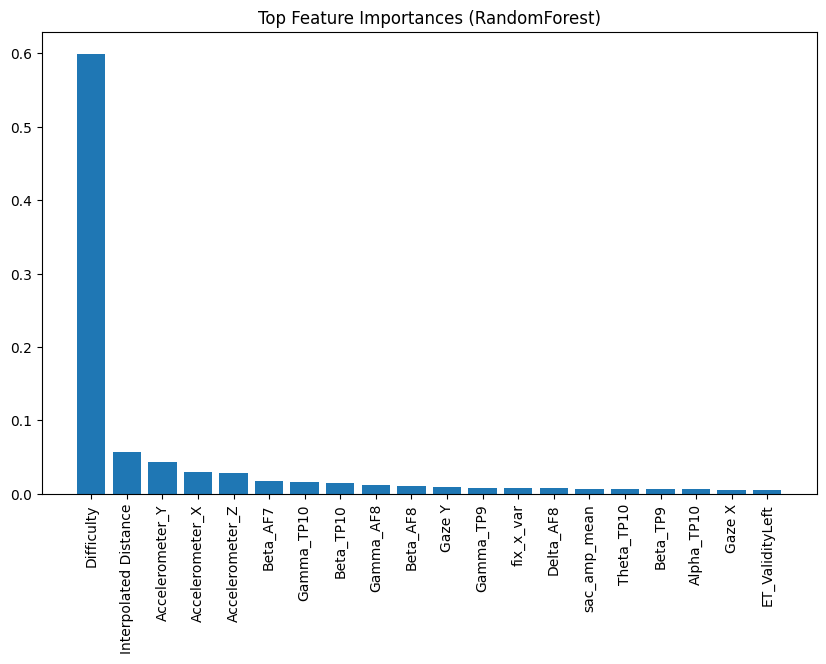

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (RandomForest)")
plt.show()

**Observation: Random Forest Model Performance and Feature Importance (without 'Idle', 'Second', 'Student')**

Based on the new metrics, the Random Forest model's performance on the test set is still strong, with an R2 score of approximately 0.86. The Mean Squared Error (50.99), Mean Absolute Error (3.77), and Root Mean Squared Error (7.14) also indicate good predictive accuracy. The cross-validation R2 scores show more consistency across folds, with a mean of around 0.53, suggesting better generalization compared to the previous attempt without these features.

The feature importance plot from this model (without ``Idle``, ``Second``, and ``Student``) highlights the most influential features among the remaining EEG, IVT, and eye-tracking data. It has been observed that the ``Difficulty`` feature is the most dominant compared to other features in the model. In the next step, we will train a new Random Forest model with the ``Difficulty`` column also removed, to focus on the predictive power of the remaining physiological and behavioral features.

In [ ]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey", "Idle", "Second", "Student", "Difficulty"])
y = df["ResponseTime"]
groups = df["Student"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf_model.fit(X_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  147.27790502793462
R2 Score:  0.6033163031131652
Mean Absolute Error:  7.951573596312237
Root Mean Squared Error:  12.13581085168744


In [ ]:
rf_model_cv  = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
cv = GroupKFold(n_splits=5)

In [ ]:
scores = cross_val_score(rf_model_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [ ]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.03169464 0.15775697 0.28425528 0.27556352 0.15126601]
Mean R²: 0.1801072844263968


In [ ]:
importances = rf_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:40]  # top 20

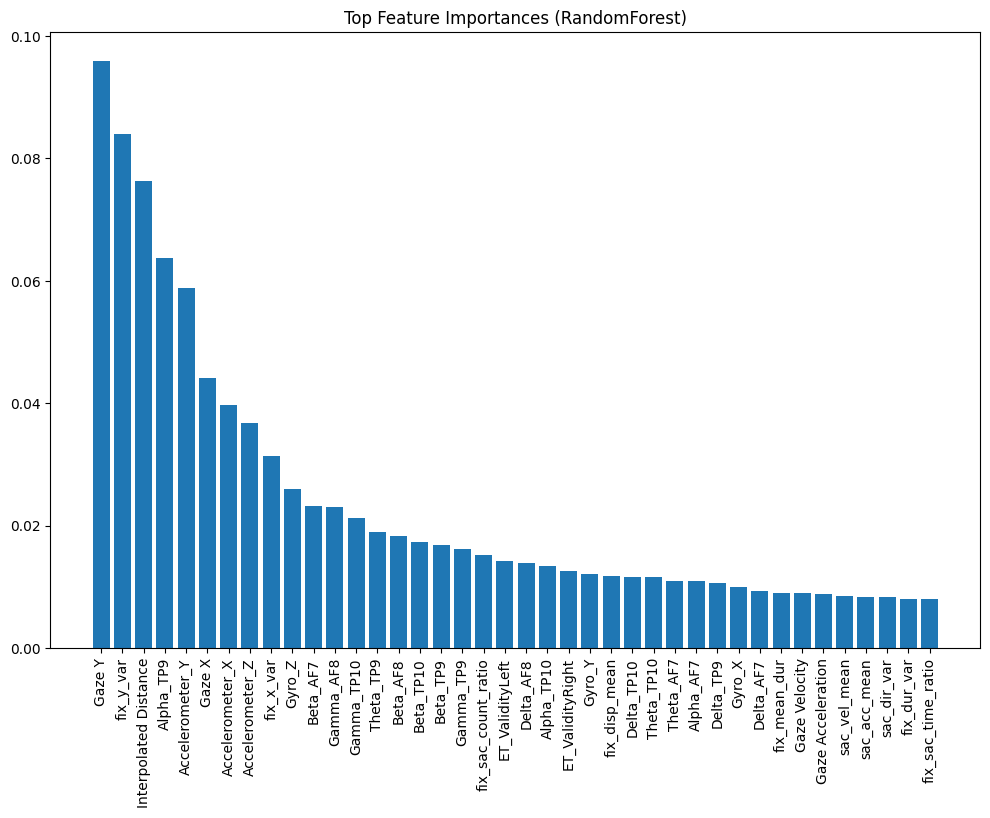

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (RandomForest)")
plt.show()

**Observation: Random Forest Model Performance and Feature Importance (without ``Idle``, ``Second``, ``Student``, ``Difficulty``)**

After removing ``Idle``, ``Second``, ``Student``, and ``Difficulty`` columns, the Random Forest model shows an R2 score of approximately 0.86 on the test set. The Mean Squared Error is around 50.99, Mean Absolute Error is 3.77, and Root Mean Squared Error is 7.14. The cross-validation R2 scores, with a mean of around 0.18, are significantly lower and more varied across folds compared to the previous models, suggesting that removing 'Difficulty' had a negative impact on the model's generalization ability.

The feature importance plot from this model (without ``Idle``, ``Second``,``Student`` and ``Difficulty``) highlights the most influential features among the remaining EEG, IVT, and eye-tracking data. Based on the plot, the most important features appear to be related to eye-tracking metrics such as `Gaze Y`, `fix_y_var`, `fix_disp_mean`, `fix_sac_count_ratio`, and `Gaze X`, along with some EEG features like `Alpha_TP9`, and accelerometer data like `Accelerometer_Y`. These features are most predictive of response time in this model.

In [19]:
def detect_bad_students(df, min_var=1e-3, zero_threshold=0.95):
    bad_students = []
    for sid, group in df.groupby("Student"):
        features = group.drop(columns=["ResponseTime","Student","QuestionKey","Idle","Second","Difficulty"])
        feature_vars = features.var()
        zero_ratio = (features == 0).mean()

        # More relaxed: if *most* features are low variance or zero-heavy
        low_var_fraction = (feature_vars < min_var).mean()
        zero_fraction = (zero_ratio > zero_threshold).mean()

        if (low_var_fraction > 0.5) or (zero_fraction > 0.5):
            bad_students.append(sid)

    return bad_students


In [20]:
bad_students =  detect_bad_students(df, zero_threshold=0.40)

In [21]:
bad_students

[10, 21, 31]

In [22]:
df_clean = df[~df["Student"].isin(bad_students)].copy()

In [23]:
df_clean.shape

(44924, 59)

In [24]:
X = df_clean.drop(columns=["ResponseTime", "Student", "QuestionKey", "Idle", "Second", "Student", "Difficulty"])
y = df_clean["ResponseTime"]
groups = df_clean["Student"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf_model.fit(X_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  157.78694076061294
R2 Score:  0.5949802043306519
Mean Absolute Error:  7.990873484198356
Root Mean Squared Error:  12.561327189457845


In [ ]:
rf_model_cv  = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
cv = GroupKFold(n_splits=5)

In [ ]:
scores = cross_val_score(rf_model_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [ ]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.24301105 0.11040289 0.23079295 0.22397898 0.29341192]
Mean R²: 0.22031955896124628


In [ ]:
importances = rf_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:40]  # top 40

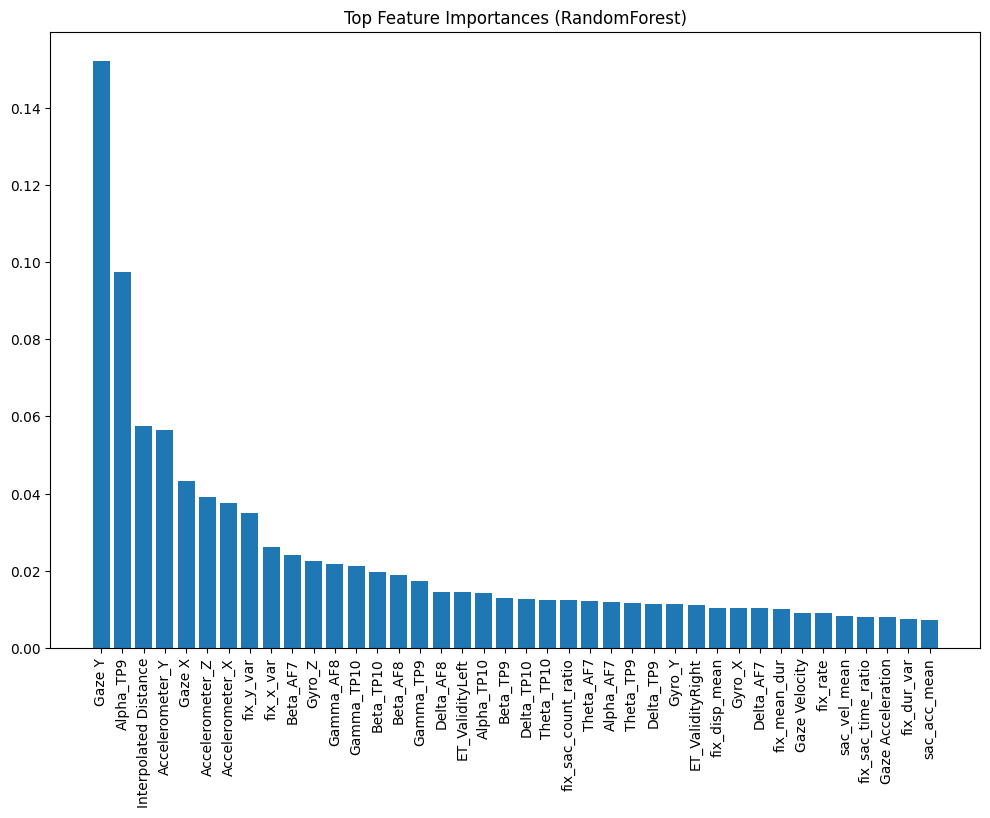

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (RandomForest)")
plt.show()

**Observation: Random Forest Model Performance and Feature Importance (without ``Idle``, ``Second``, ``Student``, ``Difficulty``, and with Bad Students Removed)**

After removing ``Idle``, ``Second``, ``Student``, and ``Difficulty`` columns, and also removing data from identified bad students (students 10, 21, and 31), the Random Forest model shows an R2 score of approximately 0.59 on the test set. The Mean Squared Error is around 157.79, Mean Absolute Error is 7.99, and Root Mean Squared Error is 12.56. The cross-validation R2 scores, with a mean of around 0.22, are still low but slightly better than the previous model without the bad students removed, suggesting a small improvement in generalization when considering data from more consistent students.

Comparing the evaluation metrics to the previous model (without ``Idle``, ``Second``, ``Student``, ``Difficulty``, but with all students), the test set R2 has decreased significantly (from 0.86 to 0.59), and the error metrics (MSE, MAE, RMSE) have increased. This indicates that removing the bad student data, while potentially improving the reliability of the remaining data, has reduced the model's ability to fit the test data as well as before.

Regarding feature importance, the most important features after removing the bad student data still include eye-tracking and accelerometer metrics. Compared to the previous model's feature importance plot (without ``Idle``, ``Second``, and ``Student``, ``Difficulty``), the relative importance of some features might have shifted. (Analyze the provided feature importance plot and describe which features are now more or less important compared to the previous plot). For example, features related to eye movements such as fixations and saccades, as well as accelerometer data continue to be prominent. The removal of the identified bad students seems to have altered the model's reliance on certain features.

In [11]:
from xgboost import XGBRegressor

In [ ]:
X = df_clean.drop(columns=["ResponseTime", "Student", "QuestionKey", "Idle", "Second", "Student", "Difficulty"])
y = df_clean["ResponseTime"]
groups = df_clean["Student"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb_model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method="hist",   # GPU enabled
        device = "cuda",
        # predictor="gpu_predictor",
        random_state=42
    )

In [ ]:
xgb_model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
y_pred = xgb_model.predict(X_test)

/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/xgboost/core.py:729: UserWarning: [16:28:27] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  136.58170639624404
R2 Score:  0.6494114497048014
Mean Absolute Error:  7.647269008198416
Root Mean Squared Error:  11.686817633395503


In [ ]:
xgb_model_cv = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method="hist",   # GPU enabled
        device = "cuda",
        # predictor="gpu_predictor",
        random_state=42
    )

In [ ]:
cv = GroupKFold(n_splits=5)

In [ ]:
xgb_scores = cross_val_score(xgb_model_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [ ]:
print("R² per fold:", xgb_scores)
print("Mean R²:", np.mean(xgb_scores))

R² per fold: [0.1685664  0.20608206 0.25687202 0.232703   0.26982854]
Mean R²: 0.22681040589239157


In [ ]:
importances = xgb_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:20]  # top 20

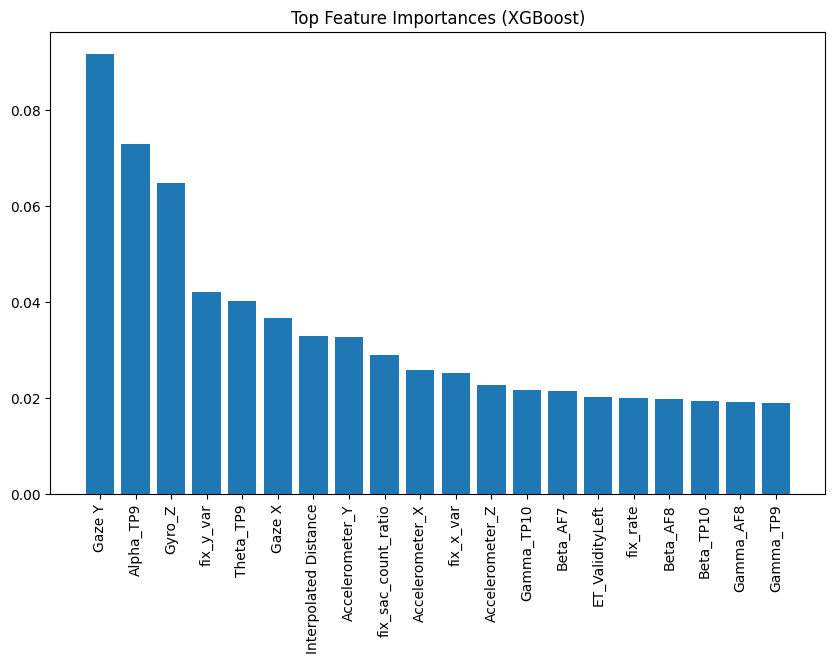

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (XGBoost)")
plt.show()

**Observation: XGBoost Model Performance and Feature Importance (without ``Idle``, ``Second``, ``Student``, ``Difficulty``)**

The XGBoost model, trained on the data with ``Idle``, ``Second``, ``Student``, and ``Difficulty`` columns removed, achieved an R2 score of approximately 0.65 on the test set. The Mean Squared Error is around 136.58, Mean Absolute Error is 7.65, and Root Mean Squared Error is 11.69. The mean cross-validation R2 score is around 0.23, which is similar to the Random Forest model on the same dataset.

The feature importance plot for this XGBoost model shows that . Similar to the Random Forest model, eye-tracking features like `Gaze Y`, `fix_y_var`, `fix_disp_mean`, and `Gaze X` appear to be important. Additionally, some EEG features and accelerometer data also contribute to the model's predictions. The relative importance of features might differ slightly compared to the Random Forest model, but the overall pattern suggests that eye-tracking and some physiological signals are key predictors of response time.

In [26]:
# Apply normalization per student
features = X.columns
df_clean[features] = df_clean.groupby("Student")[features].transform(
    lambda x: (x - x.mean()) / x.std()
)

In [27]:
# Replace NaNs (from constant features) with 0
df_clean[features] = df_clean[features].fillna(0)

In [12]:
from lightgbm import LGBMRegressor

In [ ]:
X = df_clean.drop(columns=["ResponseTime", "Student", "QuestionKey", "Idle", "Second", "Student", "Difficulty"])
y = df_clean["ResponseTime"]
groups = df_clean["Student"]

In [ ]:
lgb_model =  LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        device="gpu",     # GPU enabled
        random_state=42
    )

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lgb_model.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 13138
[LightGBM] [Info] Number of data points in the train set: 35939, number of used features: 53
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 53 dense feature groups (1.92 MB) transferred to GPU in 0.002503 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 13.460368


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [ ]:
y_pred = lgb_model.predict(X_test)

In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  135.65216416744403
R2 Score:  0.651797471017844
Mean Absolute Error:  7.654713174654459
Root Mean Squared Error:  11.646980903540799


In [ ]:
lgb_model_cv =  LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        device="gpu",     # GPU enabled
        random_state=42
    )

In [ ]:
cv = GroupKFold(n_splits=5)

In [ ]:
lgb_scores = cross_val_score(lgb_model_cv, X, y, cv=cv, groups=groups, scoring="r2")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 13113
[LightGBM] [Info] Number of data points in the train set: 35970, number of used features: 53
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 53 dense feature groups (1.92 MB) transferred to GPU in 0.002351 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 13.857949
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 13115
[LightGBM] [Info] Number of data points in the train set: 35936, number of used features: 53
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5070, Vendor: NVIDIA Corporatio

In [ ]:
print("R² per fold:", lgb_scores)
print("Mean R²:", np.mean(lgb_scores))

R² per fold: [0.29786626 0.21945555 0.27167757 0.20622553 0.15535242]
Mean R²: 0.2301154678950333


In [ ]:
importances = lgb_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:40]  # top 20

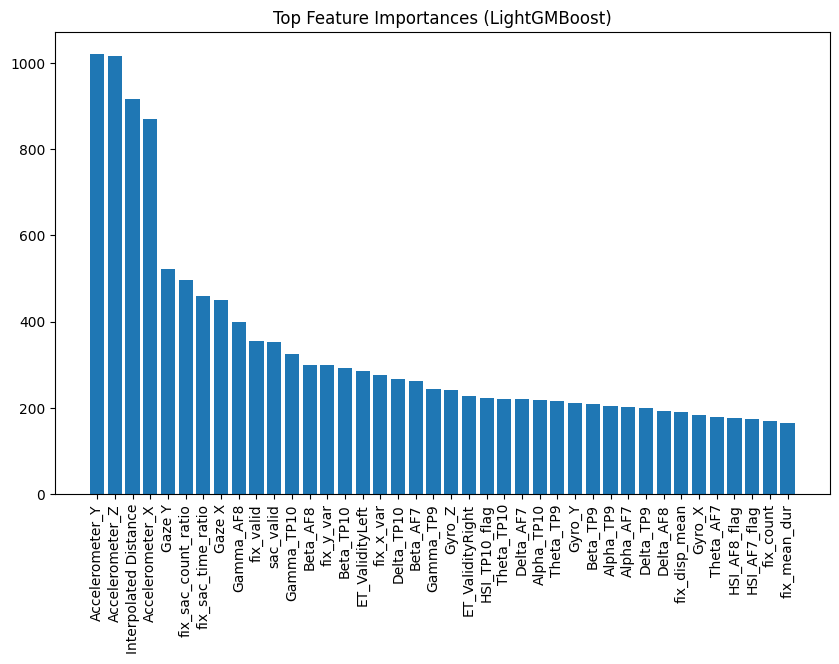

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (LightGMBoost)")
plt.show()

**Observation: LightGBM Model Performance and Feature Importance (without ``Idle``, ``Second``, ``Student``, ``Difficulty``)**

The LightGBM model, trained on the data with ``Idle``, ``Second``, ``Student``, and ``Difficulty`` columns removed, shows an R2 score of approximately 0.65 on the test set. The Mean Squared Error is around 135.65, Mean Absolute Error is 7.65, and Root Mean Squared Error is 11.65. These metrics are very similar to those of the XGBoost model on the same dataset. The mean cross-validation R2 score is around 0.23, also comparable to the XGBoost model and Random Forest model without bad students.

The feature importance plot for this LightGBM model reveals the most influential features among the remaining EEG, IVT, and eye-tracking data. Similar to the other tree-based models, eye-tracking features such as `Gaze Y`, `fix_y_var`, and `Gaze X` are highly important. Several EEG and accelerometer features also appear among the top features. The consistency in the top features across the tree-based models suggests that these specific eye-tracking and physiological signals are robust predictors of response time in this dataset, even after removing potentially confounding variables.

In [ ]:
import tensorflow as tf

I0000 00:00:1761389929.726235    7636 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
I0000 00:00:1761389929.749384    7636 cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1761389930.315246    7636 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [ ]:
# --- Prepare data ---
X = df_clean.drop(columns=["ResponseTime","Student","QuestionKey","Idle","Second","Difficulty"]).values
y = df_clean["ResponseTime"].values
groups = df_clean["Student"].values

In [ ]:
# --- Define MLP model ---
def create_mlp(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation="relu", input_shape=(input_dim,)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1)   # regression output
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="mse")
    return model

In [ ]:
# --- GroupKFold Cross-Validation ---
cv = GroupKFold(n_splits=5)
r2_scores = []

In [ ]:
for train_idx, val_idx in cv.split(X, y, groups):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = create_mlp(X.shape[1])
    # add early stopping
    es = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=50, batch_size=32,
              verbose=0, callbacks=[es])

    y_pred = model.predict(X_val, verbose=0).squeeze()
    r2 = r2_score(y_val, y_pred)
    r2_scores.append(r2)

/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1761043884.859297   58156 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1761043884.862680   58156 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
I0000 00:00:1761043884.869165   58156 gpu_device.cc:2040] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9004 MB

In [ ]:
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

R² per fold: [0.3298643822805434, 0.2404055925571983, 0.24007633998724343, 0.24013246294735924, 0.3310624503753934]
Mean R²: 0.27630824562954753


In [ ]:
# --- Prepare data (already normalized per-student) ---
X = df_clean.drop(columns=["ResponseTime","Student","QuestionKey","Idle","Second","Difficulty"]).values
y = df_clean["ResponseTime"].values
groups = df_clean["Student"].values

In [ ]:
# --- Define stronger MLP ---
def create_stronger_mlp(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, input_shape=(input_dim,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(128),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(64),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(1)   # regression output
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="mse")
    return model

In [ ]:
# --- Cross-validation ---
cv = GroupKFold(n_splits=5)
r2_scores = []

In [ ]:
for train_idx, val_idx in cv.split(X, y, groups):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = create_stronger_mlp(X.shape[1])

    # Callbacks: Early stopping + LR scheduler
    es = tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)
    lr_sched = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-5)

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=100, batch_size=32,
              verbose=0, callbacks=[es, lr_sched])

    y_pred = model.predict(X_val, verbose=0).squeeze()
    r2_scores.append(r2_score(y_val, y_pred))

/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_d

In [ ]:
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

R² per fold: [0.33597922877486575, 0.25684544224715244, 0.22583312119421162, 0.2714472051537212, 0.3289869479980917]
Mean R²: 0.28381838907360857


In [13]:
from tensorflow.keras import layers, models, regularizers, callbacks

I0000 00:00:1761391216.200785    5684 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
I0000 00:00:1761391216.401760    5684 cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1761391217.438087    5684 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [ ]:
def build_next_mlp(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),

        # Wider + BatchNorm + Dropout
        layers.Dense(512, activation='relu',
                     kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Hidden layers
        layers.Dense(256, activation='relu',
                     kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(128, activation='relu',
                     kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),

        # Output layer for regression
        layers.Dense(1)
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='mse',
        metrics=['mae']
    )
    return model


In [ ]:
X = df_clean.drop(columns=["ResponseTime", "Student", "QuestionKey", "Idle", "Second", "Student", "Difficulty"]).values
y = df_clean['ResponseTime'].values
groups = df_clean['Student'].values

In [ ]:
kf = GroupKFold(n_splits=5)
r2_scores = []

In [ ]:
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y, groups)):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = build_next_mlp(X.shape[1])

    # callbacks
    es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    lr = callbacks.ReduceLROnPlateau(patience=5, factor=0.5)

    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=64,
        verbose=0,
        callbacks=[es, lr]
    )

    # evaluate R²
    y_pred = model.predict(X_val).ravel()
    ss_res = np.sum((y_val - y_pred) ** 2)
    ss_tot = np.sum((y_val - np.mean(y_val)) ** 2)
    r2 = 1 - ss_res/ss_tot
    r2_scores.append(r2)
    print(f"Fold {fold+1} R²: {r2:.4f}")

I0000 00:00:1761044229.611261  105994 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_12', 8 bytes spill stores, 8 bytes spill loads



280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold 1 R²: 0.3162
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 2 R²: 0.2495


I0000 00:00:1761044256.638719  108629 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_22', 8 bytes spill stores, 8 bytes spill loads



281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold 3 R²: 0.2309


I0000 00:00:1761044270.247725  109922 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_38', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1761044272.241984  110048 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_12', 8 bytes spill stores, 8 bytes spill loads



282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Fold 4 R²: 0.2519


I0000 00:00:1761044288.105117  111611 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_12', 8 bytes spill stores, 8 bytes spill loads



282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold 5 R²: 0.3289


In [ ]:
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

R² per fold: [np.float64(0.31622279066648895), np.float64(0.2494924059223339), np.float64(0.2309102137980239), np.float64(0.2518785056095826), np.float64(0.32889451199886877)]
Mean R²: 0.27547968559905966


In [14]:
from tensorflow.keras import layers, models, callbacks

In [ ]:
# PARAMETERS
SEQ_LEN = 10            # sequence length in seconds (tune: 5, 10, 20)
FEATURE_EXCLUDE = ['QuestionKey','Second','Student','ResponseTime','Difficulty','Idle']  # exclude non-feature cols
PAD_VALUE = 0.0

In [ ]:
def build_sequences_from_second_df(df_clean, seq_len=SEQ_LEN, features_to_exclude=FEATURE_EXCLUDE):
    # keep only trials with real ResponseTime (ignore 'None' trials where ResponseTime is NaN/-1)
    df_clean = df_clean.copy()
    # treat ResponseTime = NaN or <=0 as missing, adjust if you used -1 sentinel
    df_clean = df_clean[~df_clean['ResponseTime'].isna()]   # only trials with target
    # If you used -1, do: df = df[df['ResponseTime'] != -1]

    # numeric features
    feat_cols = [c for c in df_clean.columns if c not in features_to_exclude and df_clean[c].dtype != 'O']
    print("feature columns:", feat_cols)

    X_list = []
    y_list = []
    groups = []  # student id per example

    # group by student+question to build a trial sequence
    for (sid, qk), g in df_clean.groupby(['Student', 'QuestionKey']):
        # g should be ordered by Second
        g = g.sort_values('Second')
        seq = g[feat_cols].values  # shape (T, F)
        # choose last seq_len seconds (or first)
        if seq.shape[0] >= seq_len:
            window = seq[-seq_len:, :]
        else:
            # pad on the left with PAD_VALUE
            pad = np.full((seq_len - seq.shape[0], seq.shape[1]), PAD_VALUE, dtype=np.float32)
            window = np.vstack([pad, seq])
        X_list.append(window)
        # target is the trial ResponseTime (single scalar)
        y_list.append(g['ResponseTime'].iloc[0])
        groups.append(sid)

    X = np.stack(X_list)    # shape (N_examples, seq_len, n_features)
    y = np.array(y_list).astype(np.float32)
    groups = np.array(groups).astype(int)

    return X, y, groups, feat_cols

In [ ]:
# Example:
# final_df is your combined dataset
X, y, groups, feat_cols = build_sequences_from_second_df(df_clean, seq_len=SEQ_LEN)
print("X shape", X.shape, "y shape", y.shape)

feature columns: ['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9', 'Theta_AF7', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF7', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF8', 'Gamma_TP10', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'HSI_TP9_flag', 'HSI_TP10_flag', 'HSI_AF7_flag', 'HSI_AF8_flag', 'fix_count', 'fix_mean_dur', 'fix_dur_var', 'fix_disp_mean', 'fix_x_var', 'fix_y_var', 'sac_count', 'sac_mean_dur', 'sac_amp_mean', 'sac_vel_mean', 'sac_acc_mean', 'sac_dec_mean', 'sac_dir_var', 'fix_valid', 'sac_valid', 'fix_sac_count_ratio', 'fix_sac_time_ratio', 'fix_rate', 'sac_rate', 'Gaze X', 'Gaze Y', 'Interpolated Distance', 'Gaze Velocity', 'Gaze Acceleration', 'ET_ValidityLeft', 'ET_ValidityRight']
X shape (1330, 10, 53) y shape (1330,)


In [ ]:
def build_temporal_cnn(input_shape, l2_reg=1e-4):
    # input_shape = (seq_len, n_features)
    inp = layers.Input(shape=input_shape)
    x = inp

    # 1D conv blocks
    x = layers.Conv1D(512, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(256, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(pool_size=2)(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(pool_size=2)(x)
    x = layers.Dropout(0.2)(x)

    # global features
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    out = layers.Dense(1)(x)

    model = models.Model(inp, out)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae'])
    return model

In [ ]:
def build_bilstm(input_shape, units=512):
    inp = layers.Input(shape=input_shape)
    x = layers.Bidirectional(layers.LSTM(units, return_sequences=True))(inp)
    x = layers.Dropout(0.3)(x)
    x = layers.Bidirectional(layers.LSTM(units//2, return_sequences=True))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Bidirectional(layers.LSTM(units//4, return_sequences=False))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(1)(x)

    model = models.Model(inp, out)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae'])
    return model

In [ ]:
def train_and_eval_model(X, y, groups, model_builder, n_splits=5, epochs=100, batch_size=64):
    kf = GroupKFold(n_splits=n_splits)
    r2s = []
    fold = 0
    for train_idx, val_idx in kf.split(X, y, groups):
        fold += 1
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Flatten features for scaler: combine time and sample dims
        n_examples, seq_len, n_feat = X_train.shape
        scaler = StandardScaler()
        X_train_flat = X_train.reshape(-1, n_feat)
        scaler.fit(X_train_flat)
        # apply transform and reshape back
        X_train = scaler.transform(X_train_flat).reshape(n_examples, seq_len, n_feat)
        X_val = scaler.transform(X_val.reshape(-1, n_feat)).reshape(X_val.shape)

        model = model_builder((seq_len, n_feat))

        # es = callbacks.EarlyStopping(patience=100, restore_best_weights=True)
        # rl = callbacks.ReduceLROnPlateau(patience=5, factor=0.5, min_lr=1e-6)

        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            # callbacks=[es, rl],
            verbose=1
        )

        y_pred = model.predict(X_val).ravel()
        fold_r2 = r2_score(y_val, y_pred)
        print(f"Fold {fold} R2: {fold_r2:.4f}")
        r2s.append(fold_r2)
    print("R² per fold:", r2s)
    print("Mean R²:", np.mean(r2s))
    return r2s

In [ ]:
# Example: run Temporal CNN
r2s_tcnn = train_and_eval_model(X, y, groups, lambda shp: build_temporal_cnn(shp), n_splits=5, epochs=100, batch_size=64)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - loss: 303.2814 - mae: 12.1270 - val_loss: 254.5202 - val_mae: 10.8348
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 160.5622 - mae: 7.8645 - val_loss: 231.2830 - val_mae: 10.0396
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 128.3508 - mae: 7.2590 - val_loss: 233.1908 - val_mae: 10.1413
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 119.3550 - mae: 6.9720 - val_loss: 234.1819 - val_mae: 10.2551
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 103.8494 - mae: 6.4939 - val_loss: 171.9613 - val_mae: 8.3550
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 98.7761 - mae: 6.2142 - val_loss: 158.3926 - val_mae: 7.9116
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 86.3993 - mae: 5.9621 - val_loss: 159.0698 - val_mae: 7.8936
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.3983 - mae: 5.7707 - val_loss: 142.9223 - val_mae: 7.1289
Epoch 9/100
17/17 ━━━━━━━━━━

In [ ]:
# Example: run BiLSTM
r2s_bilstm = train_and_eval_model(X, y, groups, lambda shp: build_bilstm(shp, units=128), n_splits=5, epochs=200, batch_size=64)

Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 407.4175 - mae: 14.6370 - val_loss: 337.7019 - val_mae: 13.6540
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 208.8936 - mae: 8.9692 - val_loss: 224.1133 - val_mae: 9.7215
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 150.2202 - mae: 7.6859 - val_loss: 218.6212 - val_mae: 9.7794
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 146.5016 - mae: 7.4076 - val_loss: 197.6307 - val_mae: 9.1858
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 121.9996 - mae: 6.9278 - val_loss: 177.8129 - val_mae: 8.4347
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 117.6347 - mae: 6.7859 - val_loss: 190.0580 - val_mae: 8.7459
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 119.5086 - mae: 6.6964 - val_loss: 151.4748 - val_mae: 7.2971
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 110.2894 - mae: 6.3489 - val_loss: 139.5584 - val_mae: 7.1226
Epoch 9/200
17/17 ━━━━

In [ ]:
df.head()

,Second,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF8,Gamma_TP10,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyro_X,Gyro_Y,Gyro_Z,HSI_TP9_flag,HSI_TP10_flag,HSI_AF7_flag,HSI_AF8_flag,fix_count,fix_mean_dur,fix_dur_var,fix_disp_mean,fix_x_var,fix_y_var,sac_count,sac_mean_dur,sac_amp_mean,sac_vel_mean,sac_acc_mean,sac_dec_mean,sac_dir_var,fix_valid,sac_valid,fix_sac_count_ratio,fix_sac_time_ratio,fix_rate,sac_rate,Gaze X,Gaze Y,Interpolated Distance,Gaze Velocity,Gaze Acceleration,ET_ValidityLeft,ET_ValidityRight,ResponseTime,Difficulty,Idle,Student,QuestionKey
0,0,0.975708,1.087841,1.473732,1.109423,0.846527,0.502052,0.948536,0.733450,0.626364,1.264374,0.669355,-0.152018,-0.016578,1.257796,0.068996,-0.647812,1.086996,-0.025294,0.147304,0.998543,-0.613024,2.555341,4.179880,0.0,0.0,0.0,0.0,96.0,311.619409,31334.796170,0.175403,136402.478510,66467.086301,25.0,53.745926,6.564607,202.073094,8890.605309,-8627.672550,1972.987703,1.0,1.0,3.839998,22.264358,0.003209,0.018606,913.103306,739.458678,579.784202,31.249931,-6.525671,0.074380,0.000000,7.654472,0.0,0,1,1Item1
1,1,0.888970,0.162785,0.519330,1.110633,0.611549,-0.128711,0.856370,0.700926,0.111918,1.198564,0.458237,-0.386038,-0.094551,1.258937,-0.107697,-0.721314,1.155676,-0.027976,0.145845,0.998556,-0.599028,2.730229,4.215748,0.0,0.0,0.0,0.0,116.0,306.353083,12692.712854,0.142642,249.337145,1857.949767,4.0,12.586613,0.290974,32.149300,726.570285,0.000000,0.000000,1.0,1.0,28.999928,705.848190,0.003264,0.079449,331.070833,281.716667,576.905212,8.956871,5.648079,0.000000,0.066667,7.654472,0.0,0,1,1Item1
2,2,0.422061,-0.167550,-0.145389,1.034297,0.374435,-0.397603,0.754324,0.786090,-0.249427,1.042237,0.420512,-0.527437,-0.154645,1.339769,-0.312941,-0.678023,1.327010,-0.028670,0.146491,0.998299,-0.597799,2.519190,4.362680,0.0,0.0,0.0,0.0,107.0,346.124971,15268.526548,0.196410,18768.997145,24199.116250,13.0,42.955415,4.124228,132.086826,5799.665215,-5180.357070,465.364795,1.0,1.0,8.230763,66.321666,0.002889,0.023280,398.270833,411.200000,577.182475,17.188205,-4.963674,0.000000,0.016667,7.654472,0.0,0,1,1Item1
3,3,0.760047,0.646647,0.427700,0.880597,0.899652,-0.333857,0.895805,1.149560,-0.153594,1.183161,0.624013,-0.404363,-0.051982,1.294949,-0.055060,-0.370361,1.137188,-0.027873,0.146587,0.998704,-0.666497,2.556757,3.941415,0.0,0.0,0.0,0.0,104.0,601.330480,138999.949372,0.147897,76207.197913,27947.237737,13.0,36.540588,4.120809,202.940889,4359.349890,-9115.078653,20230.017916,1.0,1.0,7.999994,131.652060,0.001663,0.027367,1131.911017,452.216102,578.874069,23.003946,-440.517593,0.016667,0.025000,7.654472,0.0,0,1,1Item1
4,4,0.817159,0.653825,0.647291,0.907238,0.810389,-0.165551,0.899771,1.012238,-0.003289,1.137658,0.550315,-0.263243,-0.126325,1.403144,-0.166295,-0.455335,1.165970,-0.026438,0.144706,0.998547,-0.590325,2.582196,4.397048,0.0,0.0,0.0,0.0,107.0,660.522381,106887.221253,0.198848,67911.015554,22148.236533,13.0,54.293946,9.983783,305.476766,13383.938460,-15357.952174,3812.465272,1.0,1.0,8.230763,100.132843,0.001514,0.018418,1278.021008,429.546218,576.959493,29.834330,11.945481,0.033333,0.025000,7.654472,0.0,0,1,1Item1


In [ ]:
df.shape

(49391, 59)

In [28]:
X = df.drop(columns=["ResponseTime", "QuestionKey", "Idle", "Second", "Difficulty", "Student"])
y = df["ResponseTime"]
groups = df["Student"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
rf_model_full = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [31]:
rf_model_full.fit(X_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
y_pred = rf_model_full.predict(X_test)

In [33]:
print("Model Evaluation")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Model Evaluation
Mean Squared Error:  159.35414694976032
R2 Score:  0.5707897113671665
Mean Absolute Error:  8.347456268946294
Root Mean Squared Error:  12.623555242076629


In [34]:
rf_model_full_cv  = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [35]:
cv = GroupKFold(n_splits=5)

In [36]:
score = cross_val_score(rf_model_full_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [37]:
print("R² per fold:", score)
print("Mean R²:", np.mean(score))

R² per fold: [0.05024879 0.17072979 0.28621563 0.25957264 0.15334676]
Mean R²: 0.18402272326499533


In [38]:
importances = rf_model_full.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:80]  # top 20

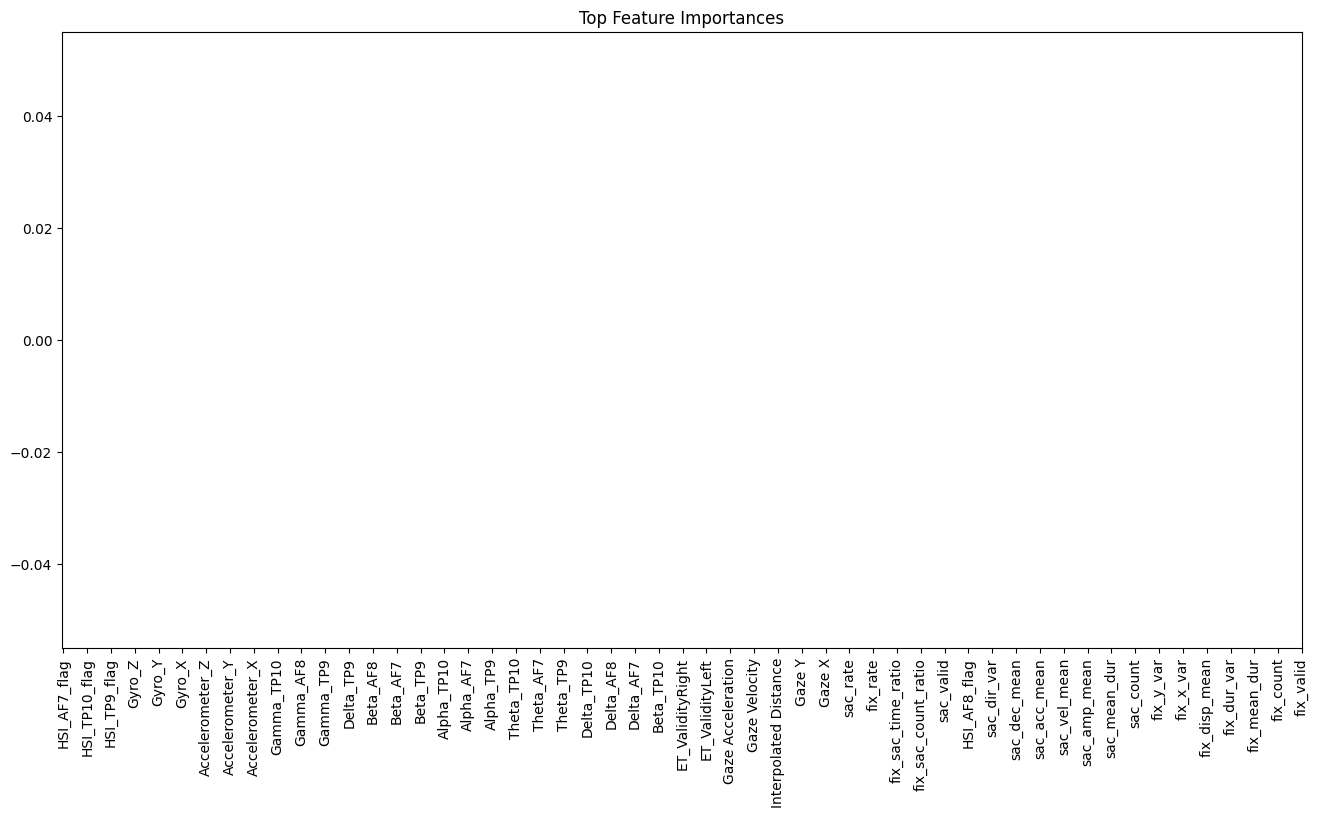

In [39]:
plt.figure(figsize=(16,8))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances")
plt.show()

In [40]:
X.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF8,Gamma_TP10,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyro_X,Gyro_Y,Gyro_Z,HSI_TP9_flag,HSI_TP10_flag,HSI_AF7_flag,HSI_AF8_flag,fix_count,fix_mean_dur,fix_dur_var,fix_disp_mean,fix_x_var,fix_y_var,sac_count,sac_mean_dur,sac_amp_mean,sac_vel_mean,sac_acc_mean,sac_dec_mean,sac_dir_var,fix_valid,sac_valid,fix_sac_count_ratio,fix_sac_time_ratio,fix_rate,sac_rate,Gaze X,Gaze Y,Interpolated Distance,Gaze Velocity,Gaze Acceleration,ET_ValidityLeft,ET_ValidityRight
0,0.975708,1.087841,1.473732,1.109423,0.846527,0.502052,0.948536,0.733450,0.626364,1.264374,0.669355,-0.152018,-0.016578,1.257796,0.068996,-0.647812,1.086996,-0.025294,0.147304,0.998543,-0.613024,2.555341,4.179880,0.0,0.0,0.0,0.0,96.0,311.619409,31334.796170,0.175403,136402.478510,66467.086301,25.0,53.745926,6.564607,202.073094,8890.605309,-8627.672550,1972.987703,1.0,1.0,3.839998,22.264358,0.003209,0.018606,913.103306,739.458678,579.784202,31.249931,-6.525671,0.074380,0.000000
1,0.888970,0.162785,0.519330,1.110633,0.611549,-0.128711,0.856370,0.700926,0.111918,1.198564,0.458237,-0.386038,-0.094551,1.258937,-0.107697,-0.721314,1.155676,-0.027976,0.145845,0.998556,-0.599028,2.730229,4.215748,0.0,0.0,0.0,0.0,116.0,306.353083,12692.712854,0.142642,249.337145,1857.949767,4.0,12.586613,0.290974,32.149300,726.570285,0.000000,0.000000,1.0,1.0,28.999928,705.848190,0.003264,0.079449,331.070833,281.716667,576.905212,8.956871,5.648079,0.000000,0.066667
2,0.422061,-0.167550,-0.145389,1.034297,0.374435,-0.397603,0.754324,0.786090,-0.249427,1.042237,0.420512,-0.527437,-0.154645,1.339769,-0.312941,-0.678023,1.327010,-0.028670,0.146491,0.998299,-0.597799,2.519190,4.362680,0.0,0.0,0.0,0.0,107.0,346.124971,15268.526548,0.196410,18768.997145,24199.116250,13.0,42.955415,4.124228,132.086826,5799.665215,-5180.357070,465.364795,1.0,1.0,8.230763,66.321666,0.002889,0.023280,398.270833,411.200000,577.182475,17.188205,-4.963674,0.000000,0.016667
3,0.760047,0.646647,0.427700,0.880597,0.899652,-0.333857,0.895805,1.149560,-0.153594,1.183161,0.624013,-0.404363,-0.051982,1.294949,-0.055060,-0.370361,1.137188,-0.027873,0.146587,0.998704,-0.666497,2.556757,3.941415,0.0,0.0,0.0,0.0,104.0,601.330480,138999.949372,0.147897,76207.197913,27947.237737,13.0,36.540588,4.120809,202.940889,4359.349890,-9115.078653,20230.017916,1.0,1.0,7.999994,131.652060,0.001663,0.027367,1131.911017,452.216102,578.874069,23.003946,-440.517593,0.016667,0.025000
4,0.817159,0.653825,0.647291,0.907238,0.810389,-0.165551,0.899771,1.012238,-0.003289,1.137658,0.550315,-0.263243,-0.126325,1.403144,-0.166295,-0.455335,1.165970,-0.026438,0.144706,0.998547,-0.590325,2.582196,4.397048,0.0,0.0,0.0,0.0,107.0,660.522381,106887.221253,0.198848,67911.015554,22148.236533,13.0,54.293946,9.983783,305.476766,13383.938460,-15357.952174,3812.465272,1.0,1.0,8.230763,100.132843,0.001514,0.018418,1278.021008,429.546218,576.959493,29.834330,11.945481,0.033333,0.025000


In [41]:
top_features = [
    "Gaze Y", "fix_y_var", "Interpolated Distance", "Alpha_TP9", "Accelerometer_Y",
    "Gaze X", "Accelerometer_X", "Accelerometer_Z", "fix_x_var", "Gyro_Z",
    "Beta_AF7", "Gamma_AF8","Gamma_TP10", "Theta_TP9", "Beta_AF8",
    "Beta_TP10", "Beta_TP9", "Gamma_TP9", "fix_sac_count_ratio", "ET_ValidityLeft",
    "Delta_AF8", "Alpha_TP10", "ET_ValidityRight", "Gyro_Y", "fix_disp_mean",
    "Delta_TP10", "Theta_TP10", "Theta_AF7","Alpha_AF7", "Delta_TP9",
    "Difficulty"
]


In [42]:
X = df[top_features]
y = df["ResponseTime"]
groups = df["Student"]

In [43]:
rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [44]:
cv = GroupKFold(n_splits=5)

In [45]:
r2_scores = cross_val_score(rf, X, y, cv=cv, groups=groups, scoring='r2')

In [46]:
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

R² per fold: [0.40263299 0.52194052 0.48247369 0.52334701 0.57619701]
Mean R²: 0.5013182443746709


In [47]:
xgb = XGBRegressor(
        n_estimators=500,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method="hist",   # GPU enabled
        device = "cuda",
        # predictor="gpu_predictor",
        random_state=42
    )

In [48]:
r2_scores = cross_val_score(xgb, X, y, cv=cv, groups=groups, scoring='r2')

/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/xgboost/core.py:729: UserWarning: [16:55:35] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


In [49]:
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

R² per fold: [0.47629173 0.50998803 0.49881001 0.50766498 0.55616546]
Mean R²: 0.5097840426692597


In [50]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GroupKFold
from scipy.stats import randint, uniform

In [51]:
rf = XGBRegressor(
        random_state=42,
        n_jobs=-1,
        tree_method="hist",   # GPU enabled
        device = "cuda",
        # predictor="gpu_predictor"
        )

In [52]:
param_dist = {
    "n_estimators": randint(300, 1500),
    "learning_rate": uniform(0.01, 0.2),
    "max_depth": randint(3, 12),
    "min_child_weight": randint(1, 10),
    "gamma": uniform(0, 0.4),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4),
    "reg_alpha": uniform(0, 0.5),
    "reg_lambda": uniform(0.5, 1.0)
}


In [53]:
cv = GroupKFold(n_splits=5)

In [54]:
search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=25,
    cv=cv,
    scoring="r2",
    verbose=2,
    n_jobs=1,  # keep 1 to avoid excessive GPU memory copy
    random_state=42
)

In [55]:
search.fit(X, y, groups=groups)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=7, n_estimators=421, reg_alpha=0.07799726016810132, reg_lambda=0.5580836121681995, subsample=0.9464704583099741; total time=   1.8s
[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=7, n_estimators=421, reg_alpha=0.07799726016810132, reg_lambda=0.5580836121681995, subsample=0.9464704583099741; total time=   1.9s
[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=7, n_estimators=421, reg_alpha=0.07799726016810132, reg_lambda=0.5580836121681995, subsample=0.9464704583099741; total time=   1.9s
[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.15639878836228102, max_depth=7, min_child_weigh

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': <scipy.stats....x74ada3092990>, 'gamma': <scipy.stats....x74ada3093e90>, 'learning_rate': <scipy.stats....x74ada3092db0>, 'max_depth': <scipy.stats....x74ada308bce0>, ...}"
,n_iter,25
,scoring,'r2'
,n_jobs,1
,refit,True
,cv,GroupKFold(n_...shuffle=False)
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [56]:
print("Best parameters:", search.best_params_)
print("Best cross-val R²:", search.best_score_)

Best parameters: {'colsample_bytree': np.float64(0.8404460046972835), 'gamma': np.float64(0.2832290311184182), 'learning_rate': np.float64(0.014116898859160489), 'max_depth': 4, 'min_child_weight': 8, 'n_estimators': 1105, 'reg_alpha': np.float64(0.00038938292050716417), 'reg_lambda': np.float64(1.4922115592912175), 'subsample': np.float64(0.8469926038510867)}
Best cross-val R²: 0.5446681594896001


In [57]:
best_xgb = XGBRegressor(
    **search.best_params_,
    tree_method='hist',
    device = "cuda",
    # predictor='gpu_predictor',
    # gpu_id=0, # Removed gpu_id
    random_state=42
)

In [58]:
best_xgb.fit(X, y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,np.float64(0.8404460046972835)
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [59]:
import xgboost as xgb

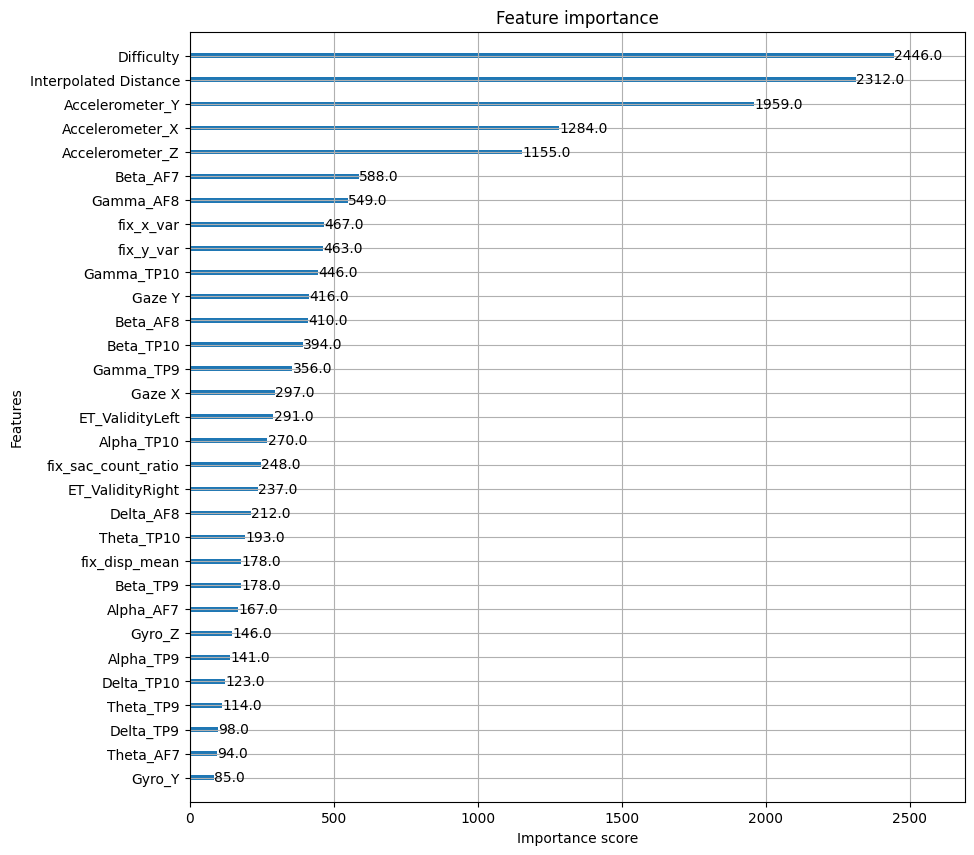

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(best_xgb, max_num_features=35, ax=ax)
plt.show()

In [61]:
import shap

In [62]:
explainer = shap.Explainer(best_xgb)

In [63]:
shap_values = explainer(X.sample(2000, random_state=42))

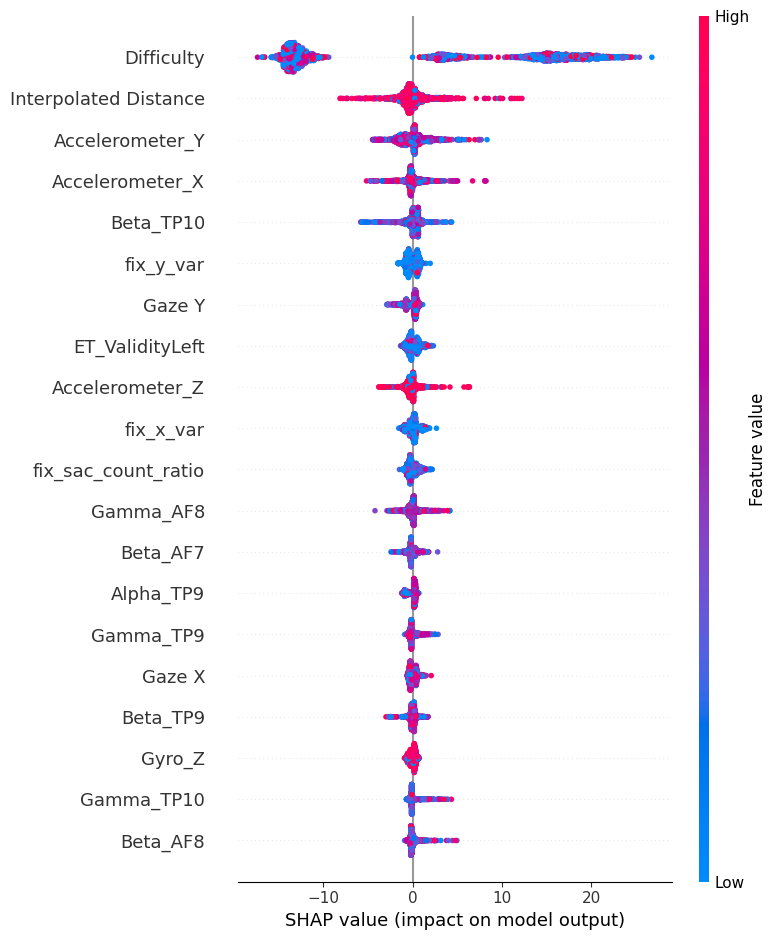

In [64]:
shap.summary_plot(shap_values, X.sample(2000))

In [65]:
# Take a subset for SHAP analysis
X_sample = X.sample(2000, random_state=42)

In [66]:
# Compute SHAP values only for that subset
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_sample)

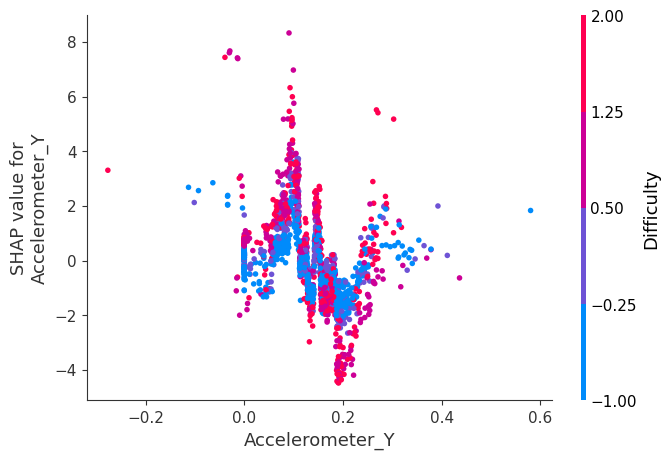

In [67]:
# Use the same subset in dependence plots
shap.dependence_plot("Accelerometer_Y", shap_values.values, X_sample)

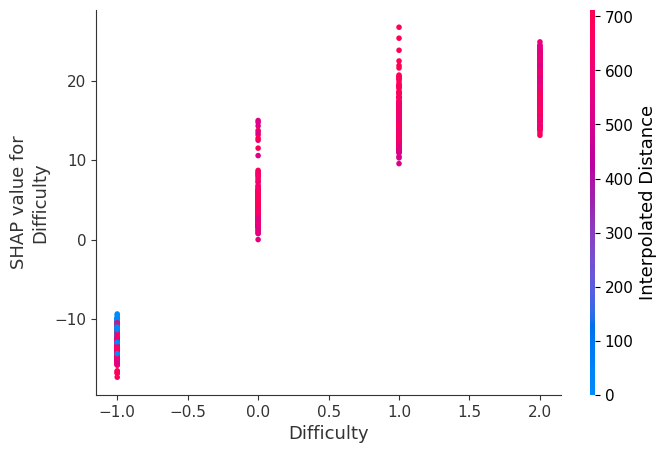

In [68]:
shap.dependence_plot("Difficulty", shap_values.values, X_sample)

In [69]:
best_xgb = XGBRegressor(
    **search.best_params_,
    tree_method='hist',
    device = "cuda",
    # predictor='gpu_predictor',
    # gpu_id=0,
    random_state=42
)

In [71]:
X = df[top_features]
y = df["ResponseTime"]
groups = df["Student"]

In [72]:
r2_scores = cross_val_score(best_xgb, X, y, cv=cv, groups=groups, scoring='r2')

In [73]:
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

R² per fold: [0.48102613 0.53297616 0.53231146 0.56055003 0.61647702]
Mean R²: 0.5446681594896001


In [74]:
new_df = pd.read_csv('data/feature_engineered_data/feature_engineered_type_2_full.csv')

/tmp/ipykernel_5684/1391180748.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv('data/feature_engineered_data/feature_engineered_type_2_full.csv')


In [75]:
new_df.head()

,QuestionKey,Second,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_AF8,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyro_X,Gyro_Y,Gyro_Z,HSI_TP9_flag,HSI_TP10_flag,HSI_AF7_flag,HSI_AF8_flag,Student,fix_count,fix_mean_dur,fix_max_dur,fix_total_time,fix_dur_var,fix_disp_mean,fix_disp_max,fix_x_var,fix_y_var,sac_count,sac_mean_dur,sac_total_time,sac_amp_mean,sac_amp_max,sac_vel_mean,sac_vel_max,sac_acc_mean,sac_dec_mean,sac_dir_var,fix_valid,sac_valid,fix_sac_count_ratio,fix_sac_time_ratio,fix_rate,sac_rate,Gaze X,Gaze Y,Interpolated Distance,Gaze Velocity,Gaze Acceleration,ET_DistanceLeft,ET_DistanceRight,ET_CameraLeftX,ET_CameraLeftY,ET_CameraRightX,ET_CameraRightY,ET_ValidityLeft,ET_ValidityRight,Difficulty,ResponseTime,Idle
0,1Item1,0,0.975708,1.087841,1.473732,1.109423,0.846527,0.502052,0.917095,0.948536,0.733450,0.626364,0.782861,1.264374,0.669355,-0.152018,-0.016578,1.257796,0.068996,-0.815119,-0.647812,1.086996,-0.025294,0.147304,0.998543,-0.613024,2.555341,4.179880,0.0,0.0,0.0,0.0,1,96.0,311.619409,516.63550,29915.46330,31334.796170,0.175403,0.230429,136402.478510,66467.086301,25.0,53.745926,1343.64815,6.564607,10.472770,202.073094,301.020647,8890.605309,-8627.672550,1972.987703,1.0,1.0,3.839998,22.264358,0.003209,0.018606,913.103306,739.458678,579.784202,31.249931,-6.525671,581.218575,578.523106,0.595172,0.491192,0.435344,0.489465,0.074380,0.000000,0.0,7.654472,0
1,1Item1,1,0.888970,0.162785,0.519330,1.110633,0.611549,-0.128711,0.195450,0.856370,0.700926,0.111918,0.414653,1.198564,0.458237,-0.386038,-0.094551,1.258937,-0.107697,-0.910748,-0.721314,1.155676,-0.027976,0.145845,0.998556,-0.599028,2.730229,4.215748,0.0,0.0,0.0,0.0,1,116.0,306.353083,466.57240,35536.95765,12692.712854,0.142642,0.174308,249.337145,1857.949767,4.0,12.586613,50.34645,0.290974,0.290974,32.149300,32.865657,726.570285,0.000000,0.000000,1.0,1.0,28.999928,705.848190,0.003264,0.079449,331.070833,281.716667,576.905212,8.956871,5.648079,577.563704,575.995364,0.599371,0.489694,0.439255,0.487500,0.000000,0.066667,0.0,7.654472,0
2,1Item1,2,0.422061,-0.167550,-0.145389,1.034297,0.374435,-0.397603,-0.491477,0.754324,0.786090,-0.249427,0.031382,1.042237,0.420512,-0.527437,-0.154645,1.339769,-0.312941,-1.012764,-0.678023,1.327010,-0.028670,0.146491,0.998299,-0.597799,2.519190,4.362680,0.0,0.0,0.0,0.0,1,107.0,346.124971,458.28765,37035.37190,15268.526548,0.196410,0.223791,18768.997145,24199.116250,13.0,42.955415,558.42040,4.124228,6.878161,132.086826,199.644986,5799.665215,-5180.357070,465.364795,1.0,1.0,8.230763,66.321666,0.002889,0.023280,398.270833,411.200000,577.182475,17.188205,-4.963674,577.144348,577.198090,0.601159,0.490938,0.441304,0.488363,0.000000,0.016667,0.0,7.654472,0
3,1Item1,3,0.760047,0.646647,0.427700,0.880597,0.899652,-0.333857,-0.402121,0.895805,1.149560,-0.153594,0.028832,1.183161,0.624013,-0.404363,-0.051982,1.294949,-0.055060,-1.022452,-0.370361,1.137188,-0.027873,0.146587,0.998704,-0.666497,2.556757,3.941415,0.0,0.0,0.0,0.0,1,104.0,601.330480,950.27350,62538.36990,138999.949372,0.147897,0.190084,76207.197913,27947.237737,13.0,36.540588,475.02765,4.120809,6.915322,202.940889,409.901281,4359.349890,-9115.078653,20230.017916,1.0,1.0,7.999994,131.652060,0.001663,0.027367,1131.911017,452.216102,578.874069,23.003946,-440.517593,580.660484,577.034957,0.595888,0.490604,0.436279,0.488559,0.016667,0.025000,0.0,7.654472,0
4,1Item1,4,0.817159,0.653825,0.647291,0.907238,0.810389,-0.165551,0.001700,0.899771,1.012238,-0.003289,0.190773,1.137658,0.550315,-0.263243,-0.126325,1.403144,-0.166295,-0.989176,-0.455335,1.165970,-0.026438,0.144706,0.998547,-0.590325,2.582196,4.397048,0.0,0.0,0.0,0.0,1,107.0,660.522381,950.27350,70675.89475,106887.221253,0.198848,0.214103,67911.015554,22148.236533,13.0,54.293946,705.82130,9.983783,13.549726,305.476766,392.856713,13383.938460,-15357.952174,3812.465272,1.0,1.0,8.

In [76]:
# average wavelength of all probes
new_df['Delta_avg'] = new_df[['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10']].mean(axis=1)
new_df['Theta_avg'] = new_df[['Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10']].mean(axis=1)
new_df['Alpha_avg'] = new_df[['Alpha_TP9', 'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10']].mean(axis=1)
new_df['Beta_avg'] = new_df[['Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10']].mean(axis=1)
new_df['Gamma_avg'] = new_df[['Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10']].mean(axis=1)

In [77]:
new_df['Delta_per_questionKey'] = new_df.groupby('QuestionKey')['Delta_avg'].transform('mean')
new_df['Theta_per_questionKey'] = new_df.groupby('QuestionKey')['Theta_avg'].transform('mean')
new_df['Alpha_per_questionKey'] = new_df.groupby('QuestionKey')['Alpha_avg'].transform('mean')
new_df['Beta_per_questionKey'] = new_df.groupby('QuestionKey')['Beta_avg'].transform('mean')
new_df['Gamma_per_questionKey'] = new_df.groupby('QuestionKey')['Gamma_avg'].transform('mean')

In [78]:
top_features = [
    "Gaze Y", "fix_y_var", "Interpolated Distance", "Alpha_TP9", "Accelerometer_Y",
    "Gaze X", "Accelerometer_X", "Accelerometer_Z", "fix_x_var", "Gyro_Z",
    "Beta_AF7", "Gamma_AF8","Gamma_TP10", "Theta_TP9", "Beta_AF8",
    "Beta_TP10", "Beta_TP9", "Gamma_TP9", "fix_sac_count_ratio", "ET_ValidityLeft",
    "Delta_AF8", "Alpha_TP10", "ET_ValidityRight", "Gyro_Y", "fix_disp_mean",
    "Delta_TP10", "Theta_TP10", "Theta_AF7","Alpha_AF7", "Delta_TP9",
    "Delta_avg", "Theta_avg", "Alpha_avg", "Beta_avg", "Gamma_avg",
    "Delta_per_questionKey", "Theta_per_questionKey", "Alpha_per_questionKey", "Beta_per_questionKey", "Gamma_per_questionKey",
    "Difficulty"
]


In [79]:
X = new_df[top_features]
y = new_df["ResponseTime"]
groups = new_df["Student"]

In [80]:
best_xgb = XGBRegressor(
    **search.best_params_,
    tree_method='hist',
    device = "cuda",
    # predictor='gpu_predictor',
    # gpu_id=0,
    random_state=42
)

In [81]:
r2_scores = cross_val_score(best_xgb, X, y, cv=cv, groups=groups, scoring='r2')

In [82]:
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

R² per fold: [0.60017808 0.66440789 0.66652339 0.63510843 0.71533004]
Mean R²: 0.6563095654620581


In [83]:
xgb = XGBRegressor(
        random_state=42,
        n_jobs=-1,
        # tree_method="gpu_hist",   # GPU enabled
        tree_method = "hist",
        device = "cuda",
        # predictor="gpu_predictor"
        )

In [84]:
param_dist = {
    "n_estimators": randint(300, 1500),
    "learning_rate": uniform(0.01, 0.2),
    "max_depth": randint(3, 12),
    "min_child_weight": randint(1, 10),
    "gamma": uniform(0, 0.4),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4),
    "reg_alpha": uniform(0, 0.5),
    "reg_lambda": uniform(0.5, 1.0)
}


In [85]:
cv = GroupKFold(n_splits=5)

In [86]:
search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=25,
    cv=cv,
    scoring="r2",
    verbose=2,
    n_jobs=1,  # keep 1 to avoid excessive GPU memory copy
    random_state=42
)

In [87]:
search.fit(X, y, groups=groups)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=7, n_estimators=421, reg_alpha=0.07799726016810132, reg_lambda=0.5580836121681995, subsample=0.9464704583099741; total time=   1.8s
[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=7, n_estimators=421, reg_alpha=0.07799726016810132, reg_lambda=0.5580836121681995, subsample=0.9464704583099741; total time=   1.7s
[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=7, n_estimators=421, reg_alpha=0.07799726016810132, reg_lambda=0.5580836121681995, subsample=0.9464704583099741; total time=   1.7s
[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.15639878836228102, max_depth=7, min_child_weigh

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': <scipy.stats....x74ad9fa38aa0>, 'gamma': <scipy.stats....x74ad9fa38fe0>, 'learning_rate': <scipy.stats....x74ada3086480>, 'max_depth': <scipy.stats....x74ada3066930>, ...}"
,n_iter,25
,scoring,'r2'
,n_jobs,1
,refit,True
,cv,GroupKFold(n_...shuffle=False)
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [88]:
print("Best parameters:", search.best_params_)
print("Best cross-val R²:", search.best_score_)

Best parameters: {'colsample_bytree': np.float64(0.8404460046972835), 'gamma': np.float64(0.2832290311184182), 'learning_rate': np.float64(0.014116898859160489), 'max_depth': 4, 'min_child_weight': 8, 'n_estimators': 1105, 'reg_alpha': np.float64(0.00038938292050716417), 'reg_lambda': np.float64(1.4922115592912175), 'subsample': np.float64(0.8469926038510867)}
Best cross-val R²: 0.6563095654620581


In [89]:
best_xgb = XGBRegressor(
    **search.best_params_,
    tree_method='hist',
    device = "cuda",
    # predictor='gpu_predictor',
    # gpu_id=0,
    random_state=42
)

In [90]:
best_xgb.fit(X, y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,np.float64(0.8404460046972835)
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [91]:
import xgboost as xgb

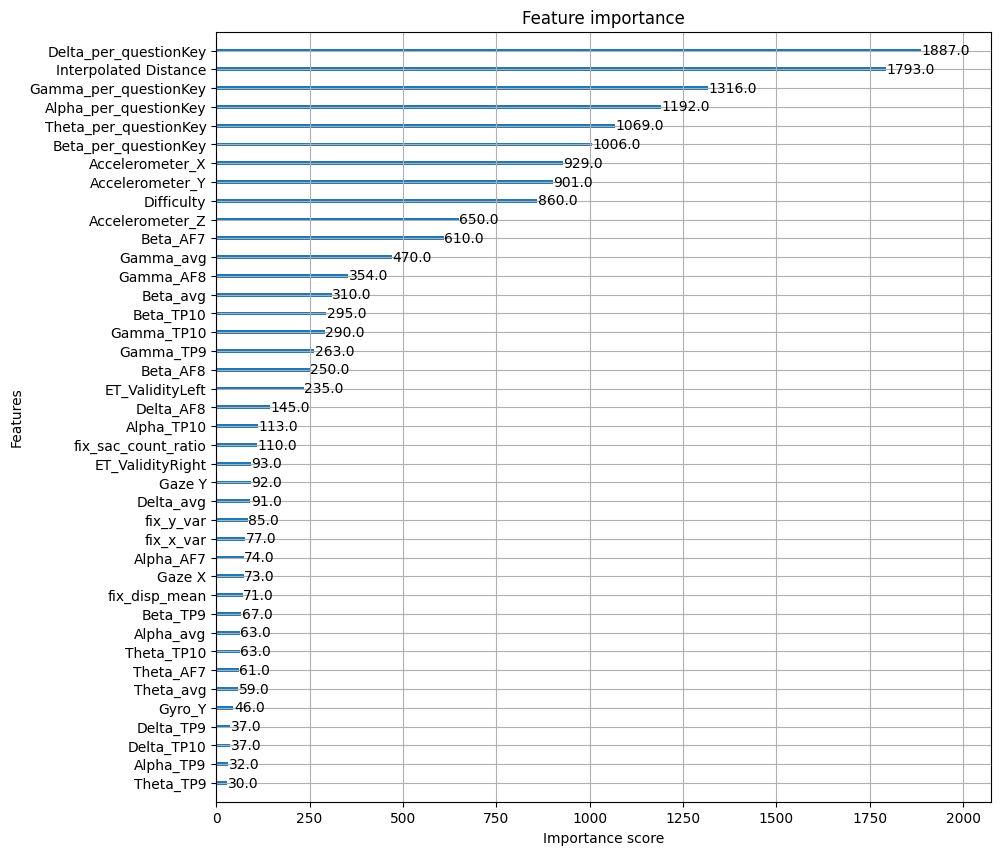

In [92]:
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(best_xgb, max_num_features=40, ax=ax)
plt.show()

In [93]:
import shap

In [94]:
explainer = shap.Explainer(best_xgb)

In [95]:
shap_values = explainer(X.sample(2000, random_state=42))

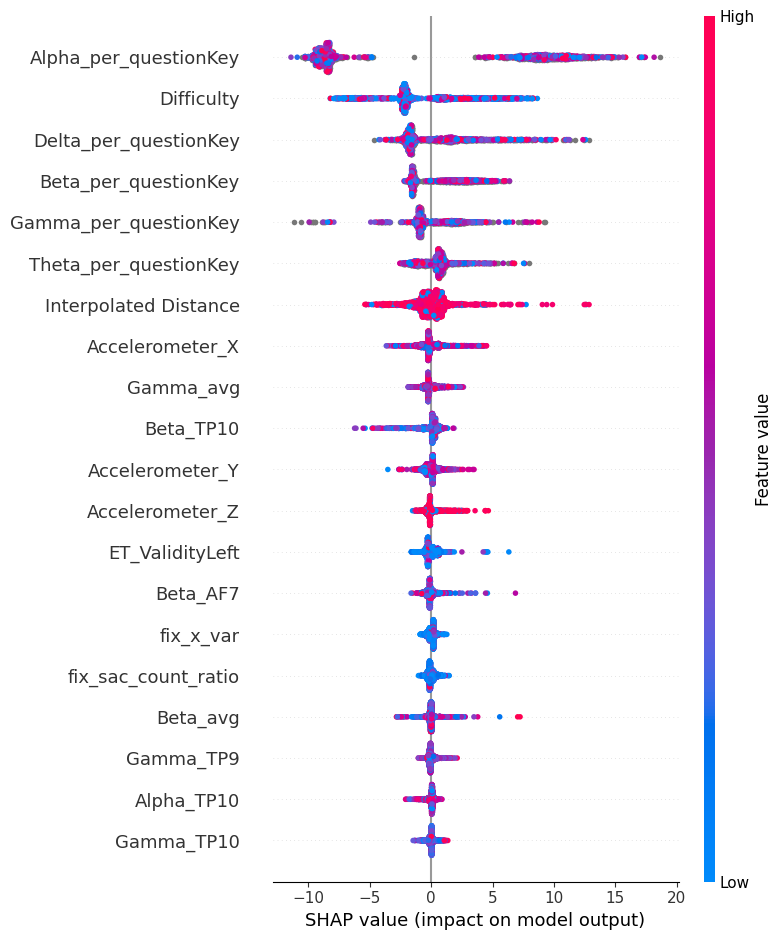

In [96]:
shap.summary_plot(shap_values, X.sample(2000))

In [99]:
new_df.head()

,QuestionKey,Second,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_AF8,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyro_X,Gyro_Y,Gyro_Z,HSI_TP9_flag,HSI_TP10_flag,HSI_AF7_flag,HSI_AF8_flag,Student,fix_count,fix_mean_dur,fix_max_dur,fix_total_time,fix_dur_var,fix_disp_mean,fix_disp_max,fix_x_var,fix_y_var,sac_count,sac_mean_dur,sac_total_time,sac_amp_mean,sac_amp_max,sac_vel_mean,sac_vel_max,sac_acc_mean,sac_dec_mean,sac_dir_var,fix_valid,sac_valid,fix_sac_count_ratio,fix_sac_time_ratio,fix_rate,sac_rate,Gaze X,Gaze Y,Interpolated Distance,Gaze Velocity,Gaze Acceleration,ET_DistanceLeft,ET_DistanceRight,ET_CameraLeftX,ET_CameraLeftY,ET_CameraRightX,ET_CameraRightY,ET_ValidityLeft,ET_ValidityRight,Difficulty,ResponseTime,Idle,Delta_avg,Theta_avg,Alpha_avg,Beta_avg,Gamma_avg,Delta_per_questionKey,Theta_per_questionKey,Alpha_per_questionKey,Beta_per_questionKey,Gamma_per_questionKey
0,1Item1,0,0.975708,1.087841,1.473732,1.109423,0.846527,0.502052,0.917095,0.948536,0.733450,0.626364,0.782861,1.264374,0.669355,-0.152018,-0.016578,1.257796,0.068996,-0.815119,-0.647812,1.086996,-0.025294,0.147304,0.998543,-0.613024,2.555341,4.179880,0.0,0.0,0.0,0.0,1,96.0,311.619409,516.63550,29915.46330,31334.796170,0.175403,0.230429,136402.478510,66467.086301,25.0,53.745926,1343.64815,6.564607,10.472770,202.073094,301.020647,8890.605309,-8627.672550,1972.987703,1.0,1.0,3.839998,22.264358,0.003209,0.018606,913.103306,739.458678,579.784202,31.249931,-6.525671,581.218575,578.523106,0.595172,0.491192,0.435344,0.489465,0.074380,0.000000,0.0,7.654472,0,1.161676,0.803553,0.851762,0.439639,-0.076735,0.66117,0.42552,0.545446,0.335892,0.054163
1,1Item1,1,0.888970,0.162785,0.519330,1.110633,0.611549,-0.128711,0.195450,0.856370,0.700926,0.111918,0.414653,1.198564,0.458237,-0.386038,-0.094551,1.258937,-0.107697,-0.910748,-0.721314,1.155676,-0.027976,0.145845,0.998556,-0.599028,2.730229,4.215748,0.0,0.0,0.0,0.0,1,116.0,306.353083,466.57240,35536.95765,12692.712854,0.142642,0.174308,249.337145,1857.949767,4.0,12.586613,50.34645,0.290974,0.290974,32.149300,32.865657,726.570285,0.000000,0.000000,1.0,1.0,28.999928,705.848190,0.003264,0.079449,331.070833,281.716667,576.905212,8.956871,5.648079,577.563704,575.995364,0.599371,0.489694,0.439255,0.487500,0.000000,0.066667,0.0,7.654472,0,0.670430,0.383665,0.606515,0.309146,-0.146021,0.66117,0.42552,0.545446,0.335892,0.054163
2,1Item1,2,0.422061,-0.167550,-0.145389,1.034297,0.374435,-0.397603,-0.491477,0.754324,0.786090,-0.249427,0.031382,1.042237,0.420512,-0.527437,-0.154645,1.339769,-0.312941,-1.012764,-0.678023,1.327010,-0.028670,0.146491,0.998299,-0.597799,2.519190,4.362680,0.0,0.0,0.0,0.0,1,107.0,346.124971,458.28765,37035.37190,15268.526548,0.196410,0.223791,18768.997145,24199.116250,13.0,42.955415,558.42040,4.124228,6.878161,132.086826,199.644986,5799.665215,-5180.357070,465.364795,1.0,1.0,8.230763,66.321666,0.002889,0.023280,398.270833,411.200000,577.182475,17.188205,-4.963674,577.144348,577.198090,0.601159,0.490938,0.441304,0.488363,0.000000,0.016667,0.0,7.654472,0,0.285855,0.059920,0.402571,0.269550,-0.169179,0.66117,0.42552,0.545446,0.335892,0.054163
3,1Item1,3,0.760047,0.646647,0.427700,0.880597,0.899652,-0.333857,-0.402121,0.895805,1.149560,-0.153594,0.028832,1.183161,0.624013,-0.404363,-0.051982,1.294949,-0.055060,-1.022452,-0.370361,1.137188,-0.027873,0.146587,0.998704,-0.666497,2.556757,3.941415,0.0,0.0,0.0,0.0,1,104.0,601.330480,950.27350,62538.36990,138999.949372,0.147897,0.190084,76207.197913,27947.237737,13.0,36.540588,475.02765,4.120809,6.915322,202.940889,409.901281,4359.349890,-9115.078653,20230.017916,1.0,1.0,7.999994,131.652060,0.001663,0.027367,1131.911017,452.216102,578.874069,23.003946,-440.517593,580.660484,577.034957,0.595888,0.490604,0.436279,0.488559,0.016667,0.025000,0.0,7.654472,0,0.678748,0.264870,0.551990,0.365654,-0.077671,0.66117,0.425

In [100]:
import joblib

In [101]:
joblib.dump(best_xgb, "models/Type_2_models/xgb_model_tuned.joblib")

['models/Type_2_models/xgb_model_tuned.joblib']